In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_digits()

In [3]:
iris_df = pd.DataFrame(iris.data)

In [4]:
dir(iris)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

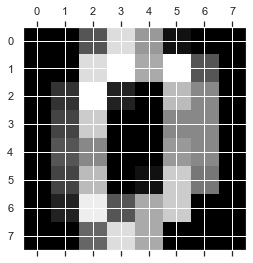

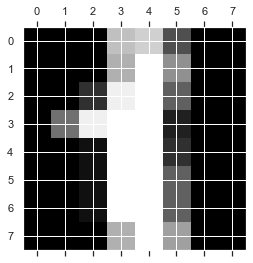

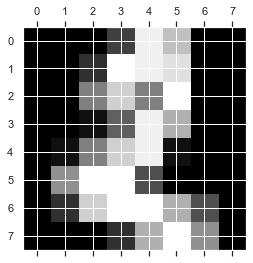

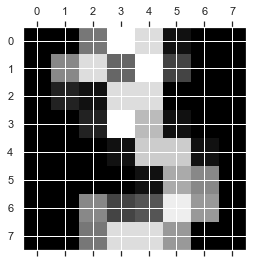

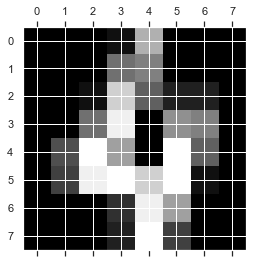

In [5]:
plt.gray()
for i in range(5):
    plt.matshow(iris.images[i])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.20, random_state = 20)

In [7]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
model.score(X_test,y_test)

0.975

In [9]:
from xgboost import XGBClassifier
model1 = XGBClassifier()
model1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [10]:
model1.score(X_test,y_test)

0.9694444444444444

In [11]:
X_train[1].shape

(64,)

In [18]:
import keras
from keras.layers import Dense,Activation,Conv2D,MaxPool2D,Dropout,Flatten
from keras.models import Sequential

In [23]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(64,)))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [24]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model2.fit(X_train,y_train,batch_size=128, epochs=15)

Epoch 1/15
1437/1437 [==============================] - 1s 698us/step - loss: 1.3969 - acc: 0.5783
Epoch 2/15
1437/1437 [==============================] - 0s 115us/step - loss: 0.2699 - acc: 0.9158
Epoch 3/15
1437/1437 [==============================] - 0s 116us/step - loss: 0.1372 - acc: 0.9569
Epoch 4/15
1437/1437 [==============================] - 0s 114us/step - loss: 0.0667 - acc: 0.9777
Epoch 5/15
1437/1437 [==============================] - 0s 118us/step - loss: 0.0325 - acc: 0.9944
Epoch 6/15
1437/1437 [==============================] - 0s 115us/step - loss: 0.0211 - acc: 0.9958
Epoch 7/15
1437/1437 [==============================] - 0s 115us/step - loss: 0.0167 - acc: 0.9965
Epoch 8/15
1437/1437 [==============================] - 0s 115us/step - loss: 0.0091 - acc: 0.9986
Epoch 9/15
1437/1437 [==============================] - 0s 116us/step - loss: 0.0053 - acc: 0.9993
Epoch 10/15
1437/1437 [==============================] - 0s 118us/step - loss: 0.0025 - acc: 1.0000
Epoch 11/

In [26]:
model2.evaluate(X_test,y_test)

360/360 [==============================] - 0s 500us/step


[0.03745362724617331, 0.9888888888888889]